In [45]:
import numpy as np;
import matplotlib.pyplot as plt;

In [2]:
class Functions(object):
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def sigmoid_derivative(sx):
        return sx * ( 1 - sx)

In [66]:
class NeuralNetwork(object):
    
    def __init__(self, iterations):

        self.iterations = iterations
        np.random.seed(1)
        
    def __initialization(self,n, l, m):
        
        W = np.zeros([n, 1])
        B = np.reshape(np.random.rand(m),[1, m])
        self.model = { "W" : W, "B": B}
        
    def __calculateZ(self, X):
        
        W = self.model["W"]
        B = self.model["B"]
        return np.dot(W.T, X) + B
    
    def train(self, X, Y):
        
        xshape = np.shape(X)
        
        self.__initialization(xshape[0], 1, xshape[1])
        
        for i in range(self.iterations):
        
            #Feed forward
            Z = self.__calculateZ(X)
            A = Functions.sigmoid(Z)
        
            #Back propagation
            DZ = Y - A
            DL = DZ * Functions.sigmoid_derivative(A)
            self.model["W"] += np.dot(X, DL.T)
            ##self.model["B"] += DZ
                    
        print(A)
        
    def predict(self, model, X):
        
        Z = self.__calculateZ(X)
        A = Functions.sigmoid(Z)
        
        return A
        
        
        
        
        
    
        

In [67]:
X = np.array([[0,0,1],
[0,1,1],
[1,0,1],
[1,1,1]]).T

Y = np.array([[0,0,1,1]]) 

nn = NeuralNetwork(10000)
nn.train(X, Y)


[[ 0.00966805  0.00786709  0.99359214  0.99211411]]


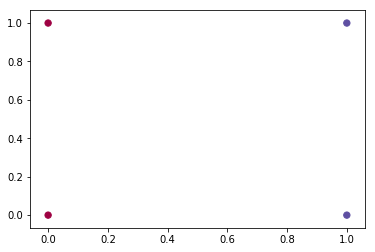

In [51]:
plt.scatter(X.T[:,0], X.T[:,1], s=40, c=Y, cmap=plt.cm.Spectral)